In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [2]:
dataset_path = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv' 
df = pd.read_csv(dataset_path)

In [3]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']]  # The subset (columns) we selected for this project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df = df.dropna(subset=['Age'])

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plots confusion matrix
    cm - confusion matrix
    classes - class list
    normalize - normalize to 1 if True
    title - plot title
    cmap - color map
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def experiment(max_depth, min_samples_split):
    """
    Builds and trains Decision Tree model
    """
    # Build and train Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    # Calculate accuracy metrics
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("accuracy", acc)

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])

    # Classification report
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    # Save model in pickle format
    with open('/workspaces/test-repo-tut1-2/outputs/models/model_dt.pkl', 'wb') as f:
        pickle.dump(model, f)

In [8]:
max_depth = 5
min_samples_split = 150

accuracy 0.7342657342657343
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.79      0.77      0.78        87
    Survived       0.66      0.68      0.67        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143



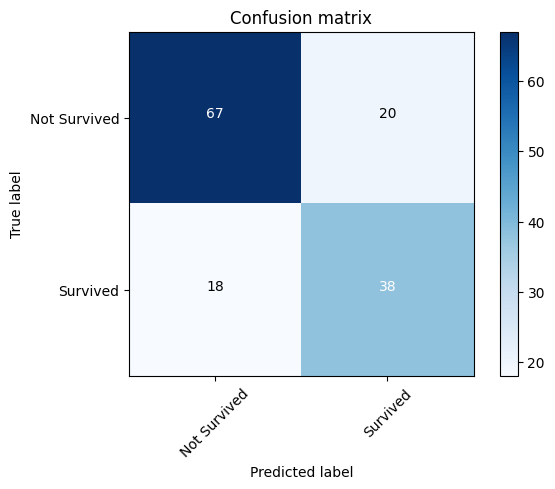

In [24]:
experiment(max_depth, min_samples_split)

In [14]:
with open('/workspaces/test-repo-tut1-2/outputs/models/model_dt.pkl', 'rb') as f:
    model = pickle.load(f)

In [15]:
person = pd.DataFrame({
	'Pclass':[3],
	'Age':[55],
	'Fare':[7.2500]	
})

prediction = model.predict(person)
print(f"The model predicts {prediction}")

The model predicts [0]


In [16]:
if prediction == [1]:
    print ("This person is, the most likely, is a survivor.")
else:
    print("This person, the most likely, perished.")

This person, the most likely, perished.


[Text(0.45454545454545453, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.484\nsamples = 571\nvalue = [337, 234]'),
 Text(0.18181818181818182, 0.75, 'Fare <= 13.646\ngini = 0.491\nsamples = 290\nvalue = [126, 164]'),
 Text(0.3181818181818182, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.2727272727272727, 0.5833333333333334, 'Age <= 53.5\ngini = 0.457\nsamples = 218\nvalue = [77, 141]'),
 Text(0.18181818181818182, 0.4166666666666667, 'Age <= 17.5\ngini = 0.424\nsamples = 187\nvalue = [57, 130]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.2727272727272727, 0.25, 'Pclass <= 1.5\ngini = 0.446\nsamples = 164\nvalue = [55, 109]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.39\nsamples = 113\nvalue = [30.0, 83.0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.5\nsamples = 51\nvalue = [25, 26]'),
 Text(0.36363636363636365, 0.4166666

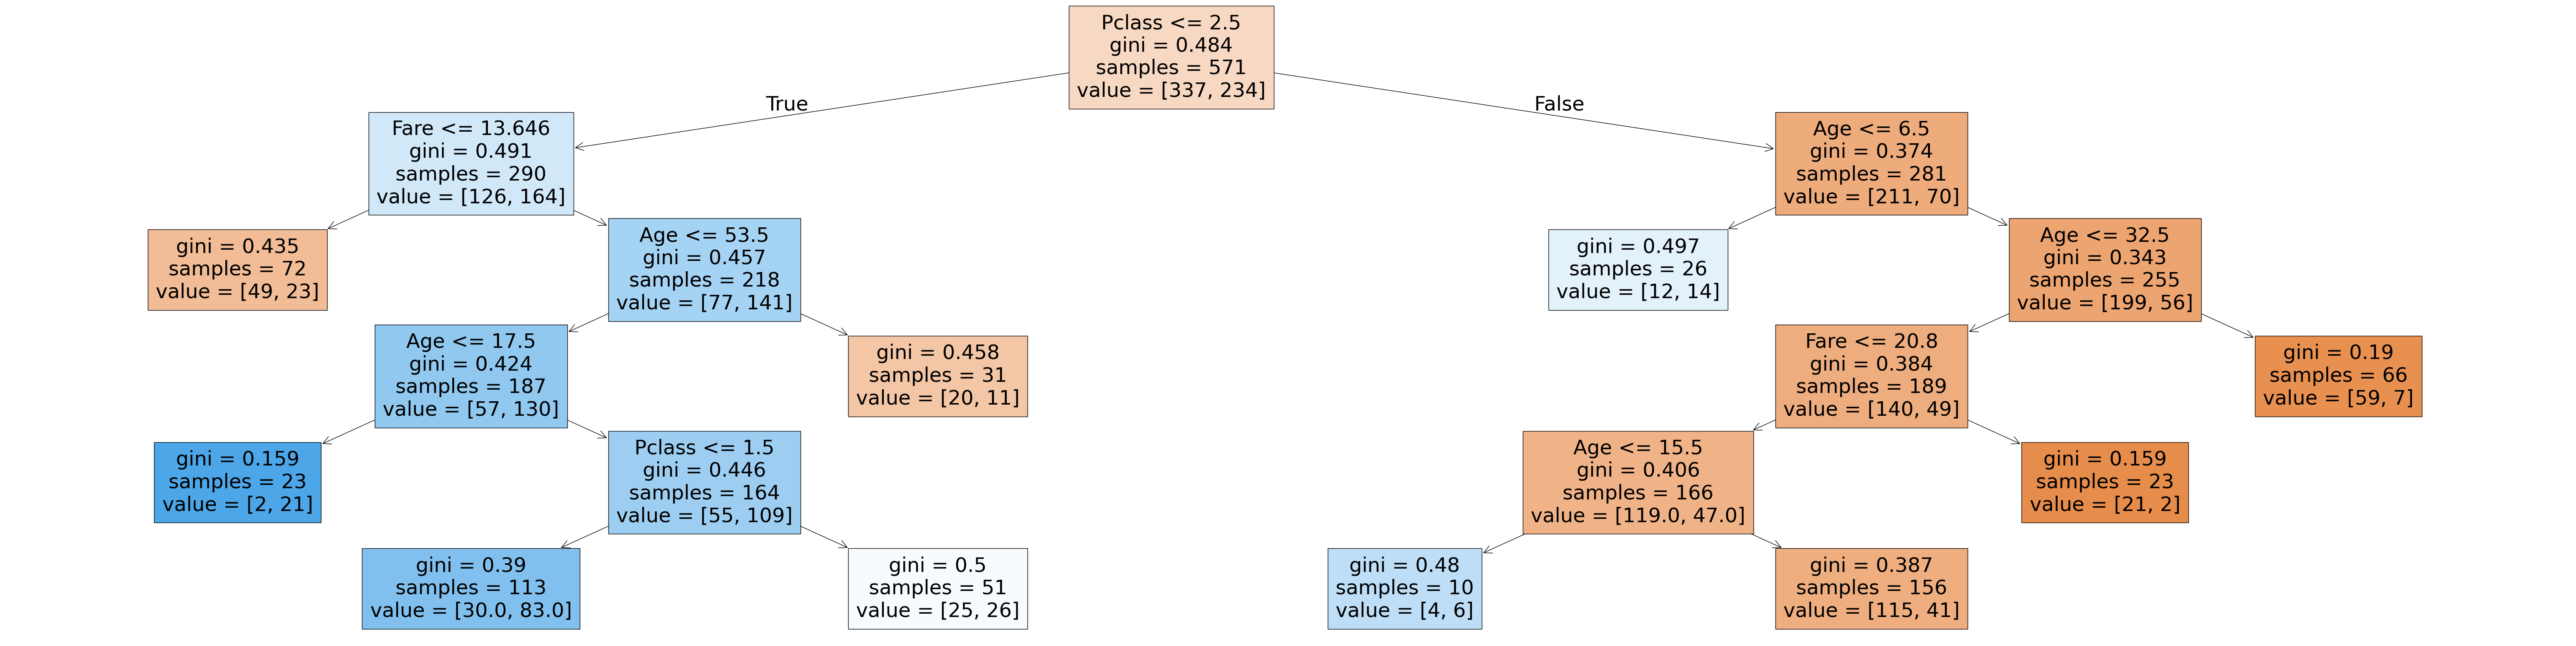

In [25]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=df.drop(columns='Survived').columns, max_depth=5, filled=True)

In [26]:
tree_text = export_text(model, max_depth=5, feature_names=df.drop(columns='Survived').columns)
print(tree_text)

|--- Pclass <= 2.50
|   |--- Fare <= 13.65
|   |   |--- class: 0
|   |--- Fare >  13.65
|   |   |--- Age <= 53.50
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  17.50
|   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  53.50
|   |   |   |--- class: 0
|--- Pclass >  2.50
|   |--- Age <= 6.50
|   |   |--- class: 1
|   |--- Age >  6.50
|   |   |--- Age <= 32.50
|   |   |   |--- Fare <= 20.80
|   |   |   |   |--- Age <= 15.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  15.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  20.80
|   |   |   |   |--- class: 0
|   |   |--- Age >  32.50
|   |   |   |--- class: 0



<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

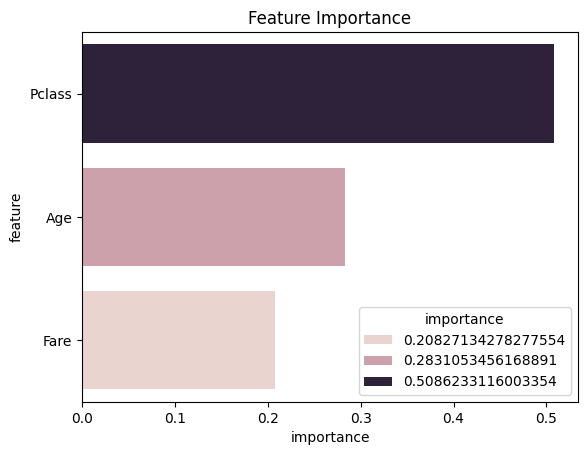

In [27]:
importance_df = pd.DataFrame({
    'feature': df.drop(columns='Survived').columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='importance')

In [28]:
def max_depth_error(md):
    """
    Returns training and validation (test) accuracy as a function of tree maximum depth
    """
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train.drop(columns='Survived'), train['Survived'])
    train_acc = 1 - model.score(train.drop(columns='Survived'), train['Survived'])
    test_acc = 1 - model.score(test.drop(columns='Survived'), test['Survived'])
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [29]:
errors_list = []

for md in range(1, 21):
    result = max_depth_error(md)
    errors_list.append(result)

errors_df = pd.DataFrame(errors_list)

In [30]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.343257,0.300699
1,2,0.294221,0.272727
2,3,0.262697,0.265734
3,4,0.255692,0.279720
4,5,0.234676,0.265734
5,6,0.215412,0.293706
6,7,0.189142,0.258741
7,8,0.162872,0.328671
8,9,0.150613,0.335664
9,10,0.124343,0.335664


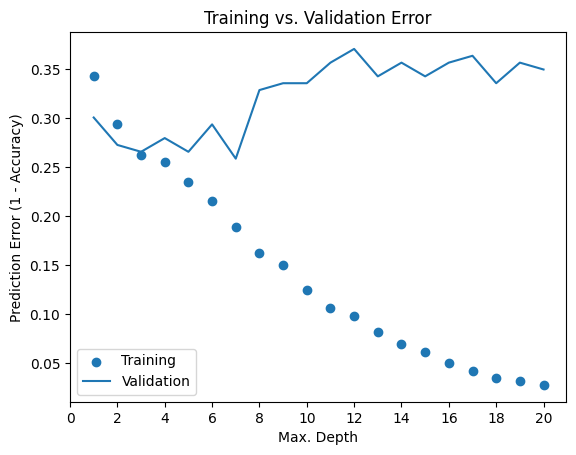

In [31]:
plt.figure()
plt.scatter(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [32]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None